\begin{center} SEIS734-02 \end{center}

\section[Section Title]{Algorithms\\}


To facilitate the effort of creating regression models for predicting the number of clicks we implemented the following algorithms.


1. Basic Regression Trees
2. Random Forest
3. Gradient Boosted Regression Tree
3. Least Absolute Shrinkage and Selection Operator (LASSO)


## Basic Regression Trees


Our first regression model to implement was the Basic Regression Tree because they are easy to understand. Because of how they are constructed they are able to handle many types of predictors without a need for pre-processing. 


Our initial assumption that the training and test datasets would contain the same set of categorical variable values was wrong. Some of the categorical variables in our dataset was too many. As a result the model generated by the training dataset could not be used to predict clicks on a test dataset which had new categorical variables. To resolve this issue we opted to remove the categorical variables that had too many values.


We also used the trees to perform feature selection. Through this process we were able to identify the most important predictors in our dataset. Using these results were were able to get an understanding of our data and possibly simplify our models by removing some predictors.


## Random Forests


The structure of the basic regression tree can change drastically with slight changes in the data. As a result they are not very stable models. Their predictive performance for regression is also not optimal. This is because non-linear relationships between the predictors and response variables cannot be defined in a rectangular subspace.

Our dataset contained some categorical variables with extremely high distinct values when compared to the size of the dataset. As a result It was susceptible to selection bias. Because of this we decided to remove the categorical variables with high granularity.


Random Forest, just like any other ensemble model, provides some advantages over models that are not. This is because they reduce the variance of the prediction through the aggregation process. Additionally, Random Forest reduces tree correlation which can happen in bagged models.

## Gradient Boosted Regression Trees

Similar to Random Forest but they use gradient boosting ensembel technique


## LASSO

Because of the low ratio of clicks in our dataset, we thought LASSO would yield better models because of regularization. The tree models showed that out of a total of 17 variables there were only 3 important variables in building the models. Because of this we wanted to use an algorithm that allows parameter estimates to be biased. This would remove some variables that are correlated through feature selection. Lasso can shrink some of the parameter estimates to 0 through penalizing. 

# Tool Selection

## GraphLab

In the previous **Project Plan** assignment we used `graphlab` to create training and test data files. We chose graphlab for data pre-processing because it uses out of core data structures. This allows the application to load large files without running out of memory.

Initially we have built all our models usign R. However, after attempting to generate models using the full data set R, turned out to not be a good option. We tried instances with 160GB of memory without success. R was too slow. As a result we re-wrote all our code using Python and GrapLab Create library.

### Installation
We used python pip to install SFrames.
1. [Install GraphLab](https://turi.com/download/install.html)
2. Install the ```graphlab-create``` Python package
3. Install the ```sframe``` python package 
```
pip install -U sframe
pip install -U graphlab-create
pip install --upgrade --no-cache-dir https://get.graphlab.com/GraphLab-Create/2.1/your registered email address here/your product key here/GraphLab-Create-License.tar.gz
```
## R

`R` has a rich library of predictive modeling algorithms which are well documented. It is also an easy to use language with good documentation. 

## AWS

We decided to use `AWS` because our data files were too big to load on our personal computers. We launched `EC2` with **GraphLab** and **160GB** of RAM.


# Data Preparation
Using our application from the project plan we generated the following files

1. clickTrainX contains the predictors for our training data
2. clickTrainY contains the solution for our training data
3. clickTestX contains the predictors for our test data
4. clickTestY contains the solution for our test data

Our dataset contains 13 predictors. `'impressions' 'display_url' 'ad_id' 'advertiser_id' 'depth' 'position' 'query_id' 'keyword_id' 'title_id' 'description_id' 'user_id' 'gender' 'age'`. Using this predictors we are trying to predict the number of clicks.

In [1]:
%%capture
import graphlab as gl

gl.canvas.set_target('ipynb')
%cd /home/davis/seis734/group/ctr-dataprep/pre_processed/
gl.product_key.set_product_key('5CB1-83CD-362E-CE06-375A-D478-9FA5-49FE')
gl.set_runtime_config('GRAPHLAB_DEFAULT_NUM_PYLAMBDA_WORKERS', 4)
clickTrainData = gl.SFrame.read_csv('clickTrainData.csv'
                                 , delimiter=',', header=True);
clickTestX = gl.SFrame.read_csv('clickTestX.csv'
                                , delimiter=',', header=True);

clickTestY = gl.SFrame.read_csv('clickTestY.csv'
                                 , delimiter=',', header=False);
clickTestY.rename({'X1': 'clicks'})

modelResults = gl.SFrame(clickTestY['clicks'])
modelResults.rename({'X1': 'clicks'})


Columns:
	clicks	int

Rows: 29933644

Data:
+--------+
| clicks |
+--------+
|   0    |
|   0    |
|   0    |
|   0    |
|   0    |
|   0    |
|   0    |
|   0    |
|   0    |
|   0    |
+--------+
[29933644 rows x 1 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

### High level data analysis

We can view the columns in our data using the `column_names` function

In [2]:
clickTrainData.column_names()

['clicks',
 'impressions',
 'display_url',
 'ad_id',
 'advertiser_id',
 'depth',
 'position',
 'query_id',
 'keyword_id',
 'title_id',
 'description_id',
 'user_id',
 'gender',
 'age']

### Categorical variables

All columns except for impressions and clicks are categorical variables. However, some of the categorical have too many distinct values. Since there was no clear way to collapse them, we opted to remove them from the models.

The variables we removed were: 
``` 
'display_url',
 'ad_id',
 'advertiser_id',
 'query_id',
 'keyword_id',
 'title_id',
 'description_id',
 'user_id'
```

The remaining categorical variables were converted to strings so that they are not treated as numeric variables.

In [3]:
clickTrainData.remove_columns(['display_url',
                             'ad_id',
                             'advertiser_id',
                             'query_id',
                             'keyword_id',
                             'title_id',
                             'description_id',
                             'user_id'])
clickTestX.remove_columns(['display_url',
                             'ad_id',
                             'advertiser_id',
                             'query_id',
                             'keyword_id',
                             'title_id',
                             'description_id',
                             'user_id'])

for c in clickTrainData.column_names():
    clickTrainData = clickTrainData.fillna(c, 0);
clickTrainData['depth'] = clickTrainData['depth'].astype(str)
clickTrainData['position'] = clickTrainData['position'].astype(str)
clickTrainData['gender'] = clickTrainData['gender'].astype(str)
clickTrainData['age'] = clickTrainData['age'].astype(str)

for c in clickTestX.column_names():
    clickTestX = clickTestX.fillna(c, 0);
clickTestX['depth'] = clickTestX['depth'].astype(str)
clickTestX['position'] = clickTestX['position'].astype(str)
clickTestX['gender'] = clickTestX['gender'].astype(str)
clickTestX['age'] = clickTestX['age'].astype(str)

## Skewness

We can visualize the distribution of clicks in our training data by using the following function

In [4]:
clickTrainData['clicks'].show()

As the charts above indicate, a majority of our training data has no clicks. As a result, the models we generate will probably predict click counts close to zero. To fix this bias we create a training dataset where 50% of the data has at least one click

In [5]:
%%capture
clickTrainDataTrans = clickTrainData[clickTrainData['clicks'] > 0]
clickTrainDataNoClicks, _ = clickTrainData[clickTrainData['clicks'] == 0]\
    .random_split(.9, seed=1011)

clickTrainDataTrans.append(
    clickTrainDataNoClicks.head(clickTrainDataTrans.num_rows()))
print 

# Basic Regression Tree Model

Our first model is a single Regression tree. Becauase of the simplicity of this model we expect the model to have sub-optimal predictive performance. Additionally with this type of tree we have a finite number of possible predicted outcomes which is determined by the number of terminal nodes. 

To test the quality of the model we use `RMSE`. We expect this tree to have the highest `RMSE` value because of it's simplicity.

In this model we used the `decision_tree_regression` function to generate our Regression Tree. 

$$SSE_{c_{p}} = SSE + c_{p} ∗ (Num Terminal Nodes)$$

In [6]:
%%capture
basicRegressionTree = gl.decision_tree_regression.create(
    clickTrainDataTrans
    , target='clicks')

## Model Evaluation

The output below shows RMSE and $R^2$ for the model generated along with the visualization of the tree

In [7]:
basicRegressionTree.show(view="Tree", tree_id=0)
basicRegressionTree.summary()

Class                          : DecisionTreeRegression

Schema
------
Number of examples             : 5062935
Number of feature columns      : 5
Number of unpacked features    : 5

Settings
--------
Max tree depth                 : 6
Train RMSE                     : 23.5182
Validation RMSE                : 5.7833
Training time (sec)            : 1.8644



![Basic Regression Tree](/home/davis/Pictures/BasicRegressionTree.png)

We can determine the most important predictors by using the `get_feature_importance` function

In [8]:
basicRegressionTree.get_feature_importance()

Columns:
	name	str
	index	str
	count	int

Rows: 17

Data:
+-------------+-------+-------+
|     name    | index | count |
+-------------+-------+-------+
| impressions |  None |   27  |
|   position  |   1   |   5   |
|    depth    |   1   |   3   |
|    depth    |   2   |   2   |
|   position  |   2   |   0   |
|    depth    |   3   |   0   |
|   position  |   3   |   0   |
|    gender   |   1   |   0   |
|    gender   |   2   |   0   |
|    gender   |   0   |   0   |
+-------------+-------+-------+
[17 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

The results indicate that the `impressions`, `position` and `depth` are the best predictors for the number of clicks. This seems correct from our understanding of the data. It makes sense that `impresions` is the best predictors because the more impressions an Ad has the more chances it has to get clicks. `depth` and `position` relate to the positioning of an Ad on a web page. Ads at the top of the page are more likely to be clicked than those at the bottom of the page.

### Basic Regression Tree Models RMSE

We can now use the to predict clicks on our test data.


In [9]:
modelResults.add_column(basicRegressionTree.predict(clickTestX),
                                                    name ='basicTree')

Columns:
	clicks	int
	basicTree	float

Rows: 29933644

Data:
+--------+----------------+
| clicks |   basicTree    |
+--------+----------------+
|   0    | 0.663707733154 |
|   0    | 0.663707733154 |
|   0    | 0.663707733154 |
|   0    | 0.663707733154 |
|   0    | 0.663707733154 |
|   0    | 0.663707733154 |
|   0    | 0.663707733154 |
|   0    | 0.663707733154 |
|   0    | 0.663707733154 |
|   0    | 0.663707733154 |
+--------+----------------+
[29933644 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

## Bagged Trees

Bagging is a technique that uses bootstrapping in conjunction with any regression model to construct an ensemble. Bagging reduces the variance of the predictions through the aggregation process.

### Random Forests

Random Forests add randomness into the learning process. The randomness reduces the correlation between trees. They work by combining decisions from a sequence of base models. The base models are generated independently using a different sample of data

$$ g(x) = f_0(x) + f_1(x) + f_2(x) + ...$$

In [10]:
%%capture
randomForest = gl.random_forest_regression.create(clickTrainDataTrans
                                                  , target='clicks'
                                                 ,max_iterations=20)

In [11]:
randomForest.show(view="Tree", tree_id=0)
randomForest.show()

Overall it looks like the validation RMSE for Random Forest is much lower than that of the basic regression tree we created earlier.

We can now use the newly created random forest model to predict the number of clicks in our test data and calculate the RMSE. 

In [12]:
modelResults.add_column(randomForest.predict(clickTestX),
                                                name ='randomForest');

## Gradient Boosted Regression Trees (GBRT)

Unlike Random Forest, GBRT uses gradient boosting by allowing optimization of an abitrary defferentiable loss function

In [13]:
%%capture
gbrt = gl.boosted_trees_regression.create(
    clickTrainDataTrans
    , target='clicks'
    , max_iterations=20)

In [14]:
gbrt.show(view="Tree", tree_id=0)
gbrt.show()

In [15]:
modelResults.add_column(gbrt.predict(clickTestX),
                                                name ='gbrt');

# Linear Regression Model

Linear models are ideal when the predictor and response variable have a linear relationship. If the relationships between the predictors variables and response variable in our data are linear then this model would be ideal.

## LASSO

Lasso performs variable selection and regularization to enhance prediction accuracy.

In [16]:
%%capture
lasso = gl.linear_regression.create(clickTrainDataTrans, 'clicks'
                                          , l2_penalty=0.
                                          , l1_penalty=1.0
                                          ,max_iterations=1000)


In [17]:
lasso.show(view="Summary")
modelResults.add_column(lasso.predict(clickTestX),
                        name = 'lasso')
modelResults.head()

Columns:
	clicks	int
	basicTree	float
	randomForest	float
	gbrt	float
	lasso	float

Rows: 10

Data:
+--------+----------------+---------------+---------------+----------------+
| clicks |   basicTree    |  randomForest |      gbrt     |     lasso      |
+--------+----------------+---------------+---------------+----------------+
|   0    | 0.663707733154 | 1.03679299355 | 1.01321649551 | 0.977695224132 |
|   0    | 0.663707733154 | 1.03592824936 | 1.01321649551 | 0.865056826126 |
|   0    | 0.663707733154 |  1.0385171175 | 1.01321649551 | 1.05029783947  |
|   0    | 0.663707733154 |  1.0385171175 | 1.01321649551 | 1.05029783947  |
|   0    | 0.663707733154 |  1.0385171175 | 1.01321649551 | 1.05029783947  |
|   0    | 0.663707733154 | 1.03609085083 | 1.01321649551 | 0.885384344742 |
|   0    | 0.663707733154 | 1.03700721264 | 1.01321649551 | 0.998022742747 |
|   0    | 0.663707733154 | 1.03743982315 | 1.01321649551 | 0.95798696008  |
|   0    | 0.663707733154 | 1.03743982315 | 1.01321649551 | 0.95798696008  |
|   0    | 0.663707733154 | 1.03743982315 | 1.01321649551 | 0.95798696008  |
+--------+----------------+---------------+---------------+----------------+
[10 rows x 5 columns]

LASSO had an `RMSE` 0.5916023 which is better than the best RMSE of the Single Regression Trees model and Random Forests. This indicates that the relationships between the predictor variables and the response variable are probably linear.

# Model Performance

We used the residual plots to visualize the residuals for each model.

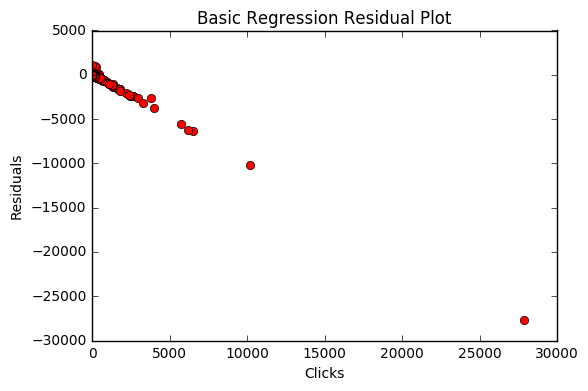

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import numpy as np

y = np.array(modelResults['clicks'])


x = np.array(modelResults['basicTree'])
yerr = modelResults['basicTree'] - modelResults['clicks']
plt.plot(y, yerr, 'ro')
plt.xlabel('Clicks')
plt.ylabel('Residuals')
plt.title('Basic Regression Residual Plot')

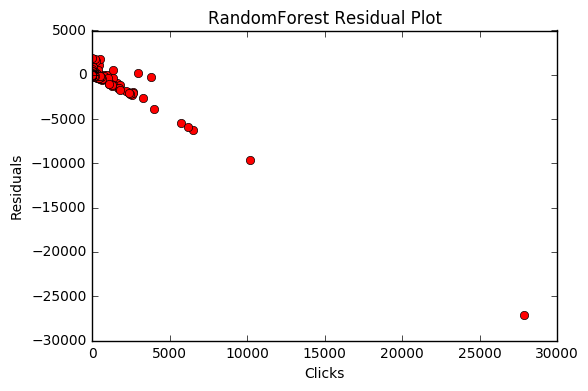

In [19]:
x = np.array(modelResults['randomForest'])
yerr = modelResults['randomForest'] - modelResults['clicks']

plt.plot(y, yerr, 'ro')
plt.xlabel('Clicks')
plt.ylabel('Residuals')
plt.title('RandomForest Residual Plot')

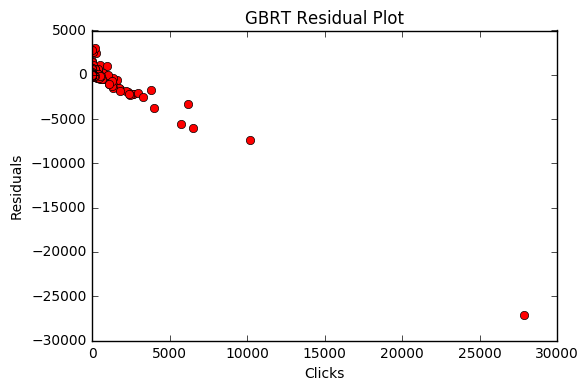

In [20]:
x = np.array(modelResults['gbrt'])
yerr = modelResults['gbrt'] - modelResults['clicks']

plt.plot(y, yerr, 'ro')
plt.xlabel('Clicks')
plt.ylabel('Residuals')
plt.title('GBRT Residual Plot')

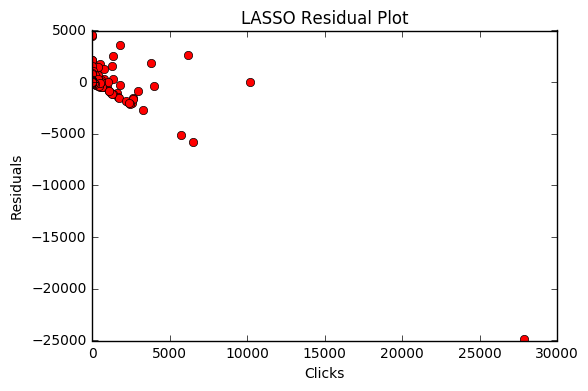

In [21]:
x = np.array(modelResults['lasso'])
yerr = modelResults['lasso'] - modelResults['clicks']

plt.plot(y, yerr, 'ro')
plt.xlabel('Clicks')
plt.ylabel('Residuals')
plt.title('LASSO Residual Plot')

The residuals for LASSO are much closer to 0 compared to the other models.

# Summary

## How do we compare

Using the algorithm provided by KDD Cup to compute the AUC for this problem, our models had the following AUC. The winning group had a model with an `RMSE` of **0.80893**

## Calculate AUC

### Basic Regression Tree

In [22]:
# Create solution file
clickTestY.add_column(clickTestX['impressions'], name='impressions')
clickTestY.save('solution_file.csv',format='csv')

brt_submission_file = modelResults['basicTree']/clickTestX['impressions']
brt_submission_file.save('brt_submission_file.csv',format='csv')
! python scoreKDD.py solution_file.csv brt_submission_file.csv 

AUC  : 0.503953
NWMAE: 122.083792
WRMSE: 1176.367388


### Random Forest

In [23]:
random_forest_file = modelResults['randomForest']/clickTestX['impressions']
random_forest_file.save('random_forest_file.csv',format='csv')
! python scoreKDD.py solution_file.csv random_forest_file.csv 

AUC  : 0.503909
NWMAE: 122.325974
WRMSE: 1176.366354


### GBRT

In [24]:
gbrt_file = modelResults['gbrt']/clickTestX['impressions']
gbrt_file.save('gbrt_file.csv',format='csv')
! python scoreKDD.py solution_file.csv gbrt_file.csv 

AUC  : 0.503908
NWMAE: 122.298342
WRMSE: 1176.365794


### LASSO

In [25]:
lasso_file = modelResults['lasso']/clickTestX['impressions']
lasso_file.save('lasso_file.csv',format='csv')
! python scoreKDD.py solution_file.csv lasso_file.csv 

AUC  : 0.504029
NWMAE: 122.252322
WRMSE: 1176.361507


# Improvements

In order to create good models we had to remove some categorical variables that had too many distinct values. Our model's predictive accuracy would have been better if we found a way to collapse/aggregate the categorical variables.

Additionally, we did not check if hte predictors and the response  variables had a linear relationship. We generated a `lasso` model which performs well when the predictors and response have a linear relationship. There is a chance that a non-liniear regression algorithm could have performed better if the predictors and response don't have a linear relationship.

